MANOJ KUMAR SINGADE

1. Introduction

Dataset I choosen is "Adults Income levels" taken from [UCI Data Base](https://archive.ics.uci.edu/dataset/2/adult) which includes information such as age, work class, education level, marital status, occupation, relationship, race, sex, capital gain, hours per week, country of residence, and income range. Exploring this dataset presents an opportunity to gain invaluable insights into various societal and economic aspects, including the relationship between education and income, disparities in income across demographic categories, and how factors like age, work, and hours worked per week may influence one's financial well-being. EDA of this dataset will not only provide a deeper understanding of these interactions but may also offer critical perspectives on income inequality, gender pay gaps, and socio-economic mobility—essential topics for addressing economic disparities and formulating equitable policy solutions. The project will involve data visualization, statistical analysis, and the application of data-driven techniques to unravel the intricate relationships within this extensive dataset. Ultimately, the findings derived from this EDA can serve as a foundation for informed decision-making and policy recommendations in the realm of socio-economic dynamics.

### Research Questions:

1. Is there evidence of a gender pay gap within this dataset? Analyze income data to determine whether there is a significant difference in earnings between males and females.

2. Investigate whether individuals with higher education levels tend to achieve greater income mobility and assess the extent to which education is a predictor of income growth.

3. Do individuals working longer hours per week tend to earn higher incomes, or is there an optimal work-life balance that leads to better financial outcomes? Analyze the relationship between hours worked per week and income.

4. Explore income disparities across demographic categories such as race, marital status, and country of residence.

#2. Data Summary

I picked the data from subset of adult income levels data set from UCI Database.

My data contains 48842 observations and 14 attributes.

>Attributes:

1. age : Age
2. workclass : workclass of the individual
3. fnlwgt
4. education : education level
5. education num : unique identification number
6. marital-status
7. Occupation
8. Race
9. sex
10. capital-gain
11. capital-loss
12. hours-per-week
13. native country
14. income (range)

In [1]:
#importing the uci databases
!pip install ucimlrepo

In [2]:
#importing the modules required for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
adult = fetch_ucirepo(id=2)
# data (as pandas dataframes)
df = adult.data.features
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
#concatenating the data set of both features and the target variable making the complete data set
adult_df = pd.concat([adult.data.features, adult.data.targets], axis=1)
#adult_df.to_csv("adults.csv")
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#attribute data types
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [6]:
adult_df.shape

(48842, 15)

Data set has 48842 observations and 14 attributes

#3. Exploratory Data Analysis

To advance in this research section, we will begin by performing a comprehensive summary statistics analysis for each of the variables. Our primary focus will be on detecting any potential outliers or missing values that might exert an impact on our findings. Subsequently, we will supplement our analysis with visual representations for each attribute using  Seaborn and Matplotlib.

In [7]:
# dropping the columns that are not in scope of my project
adult_df.drop(['fnlwgt','education-num','relationship','capital-loss'],axis=1,inplace=True)
adult_df.head()

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,0,40,Cuba,<=50K


I have dropped the unwanted columns and I have data ready for analysing it with required columns and mnow lets move ahead to handle any missing values and outliers in the data.

In [8]:
#lets check for missing values in the data set
adult_df.isnull().sum()

age                 0
workclass         963
education           0
marital-status      0
occupation        966
race                0
sex                 0
capital-gain        0
hours-per-week      0
native-country    274
income              0
dtype: int64

As there were lot of missing values in columns namely workclass occupation and native country so instead of removing these large number of values I will use data imputation techniques. Filling missing values with mode value as these columns were categorical type.

In [9]:
#fillinging missing values with most repeated value
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native-country'].fillna(adult_df['native-country'].mode()[0], inplace=True)
adult_df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Now data  does't contain any missing values

In [10]:
#there are some special characters in workclass column so I will replace it with Unknown
adult_df['workclass'] = adult_df['workclass'].replace('?', 'Unknown')
#also in income level there are only two income levels but due a dot it made them into 4 levels sowe handle them
adult_df['income'] = adult_df['income'].replace('<=50K.', '<=50K')
adult_df['income'] = adult_df['income'].replace('>50K.', '>50K')
#similarly for nativecountry column
adult_df['native-country'] = adult_df['native-country'].replace('?', 'Unknown')

In [11]:
#we will check the statistical sumamry of the dataset
adult_df.describe()

,age,capital-gain,hours-per-week
count,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,40.422382
std,13.710510,7452.019058,12.391444
min,17.000000,0.000000,1.000000
25%,28.000000,0.000000,40.000000
50%,37.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


The describe() method provides a comprehensive set of summary statistics that includes the mean, maximum, minimum, standard deviation, frequency counts, and quartile ranges. These statistics collectively offer valuable insights into the distribution and characteristics of the dataset, enabling a deeper understanding of the data's distribution and variability.

In [12]:
adult_df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

The average age is 38 years old and minimum age is 17 years old and the maximum age is 90 years old.

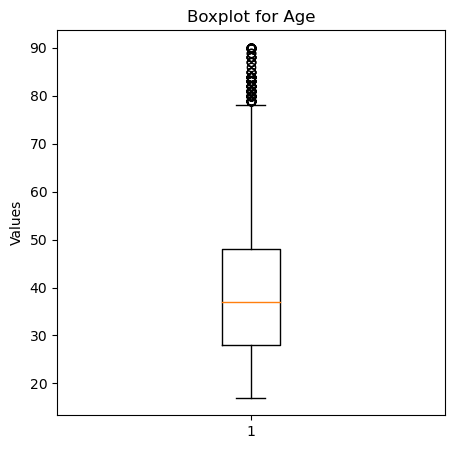

In [13]:
plt.figure(figsize=(5, 5))
plt.boxplot(adult_df['age'])
plt.title('Boxplot for Age')
plt.ylabel('Values')
plt.show()

It is evident that there are large number of outliers in the data

In [14]:
#workclass
adult_df['workclass'].describe()

count       48842
unique          9
top       Private
freq        34869
Name: workclass, dtype: object

There are 9 different work class people and totally we have 48842 instances of data

In [15]:
#sex
adult_df['sex'].describe()

count     48842
unique        2
top        Male
freq      32650
Name: sex, dtype: object

We have only male and female in the data and male has more instaces of data.

In [16]:
adult_df['education'].describe()

count       48842
unique         16
top       HS-grad
freq        15784
Name: education, dtype: object

It says that there were 16 different types of the education levels in the data and HS-Grad are the most common type of education level among the people

In [17]:
adult_df['marital-status'].describe()

count                  48842
unique                     7
top       Married-civ-spouse
freq                   22379
Name: marital-status, dtype: object

We have 7 unique types of marrital status in the data and Married-civSpouse is the most common marrital status prevailing among the people as per the data available

In [18]:
adult_df['occupation'].describe()

count              48842
unique                15
top       Prof-specialty
freq                7138
Name: occupation, dtype: object

In total data contains 15 different types of occupation among the data and Prof-Speciality being the most common among the people.

In [19]:
adult_df['race'].describe()

count     48842
unique        5
top       White
freq      41762
Name: race, dtype: object

There are 5 types of races involved in the data and White being the most common race.

In [20]:
adult_df['capital-gain'].describe()
#this is the capital gain a person has getting in a year

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

The average capital gain is 1079 USD and maximum being the 99999USd and Minimum is 0 USD

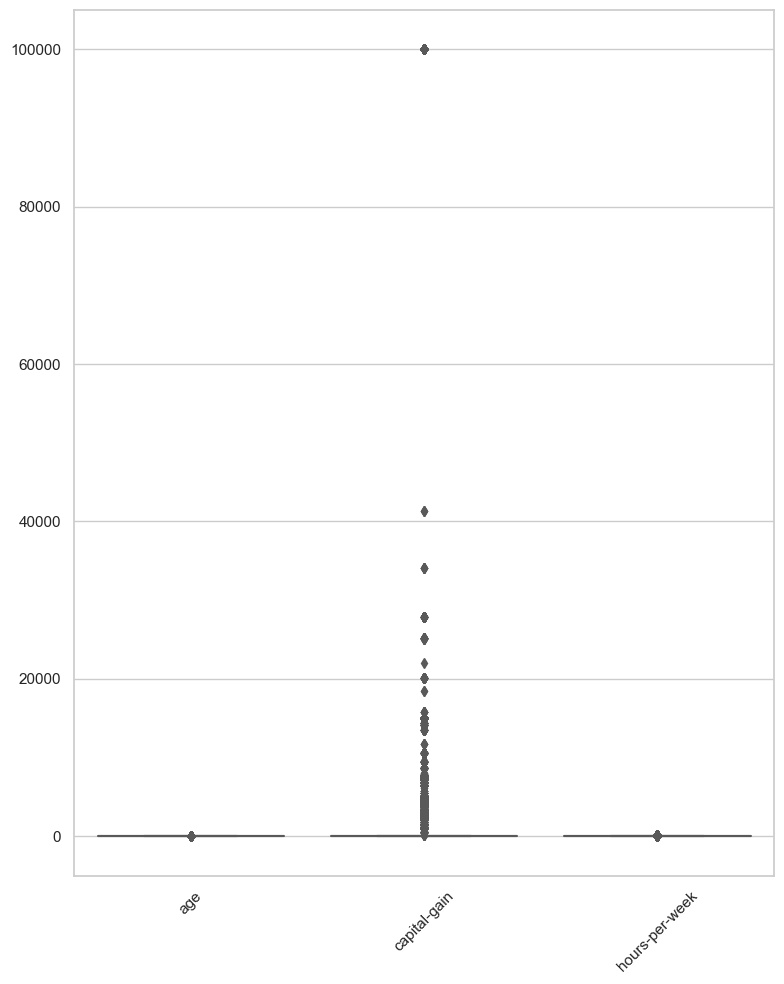

In [21]:
#boxplot for all numerical columns
plt.figure(figsize=(8, 10))
sns.set(style="whitegrid")
ax = sns.boxplot(data=adult_df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

Can observe a lot of outliers in capital gain column which migh imapct the results ina greater way. DOnt observe much in age and hours per week columns.

In [22]:
adult_df['hours-per-week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

On average the total number of work hours are 40 and maximum is 99 hours which effects the worklife balance very badly and minimum is 1hr

In [23]:
adult_df['native-country'].describe()

count             48842
unique               42
top       United-States
freq              44106
Name: native-country, dtype: object

total people from 42 different countries were exists and working .

In [24]:
adult_df['income'].describe()

count     48842
unique        2
top       <=50K
freq      37155
Name: income, dtype: object

There are 4 income levels in the data and the most people ha sincome level <=50k per year

### Age

In [25]:
#As we have age as numeric value to cehck the population age group in which people fall dividing age into age groups as below
age_bins = [0, 15, 25, 35,55,65, float('inf')]
age_labels = ['Under 15 ', '16-24', '25–34','35–54','55–64' ,'65 and over']
adult_df['age_group'] = pd.cut(adult_df['age'], bins=age_bins, labels=age_labels, right=False)


In [26]:
adult_df

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,hours-per-week,native-country,income,age_group
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,2174,40,United-States,<=50K,35–54
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,13,United-States,<=50K,35–54
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,0,40,United-States,<=50K,35–54
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,40,United-States,<=50K,35–54
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,0,40,Cuba,<=50K,25–34
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,Divorced,Prof-specialty,White,Female,0,36,United-States,<=50K,35–54
48838,64,Private,HS-grad,Widowed,Prof-specialty,Black,Male,0,40,United-States,<=50K,55–64
48839,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,White,Male,0,50,United-States,<=50K,35–54
48840,44,Private,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male,5455,40,United-States,<=50K,35–54


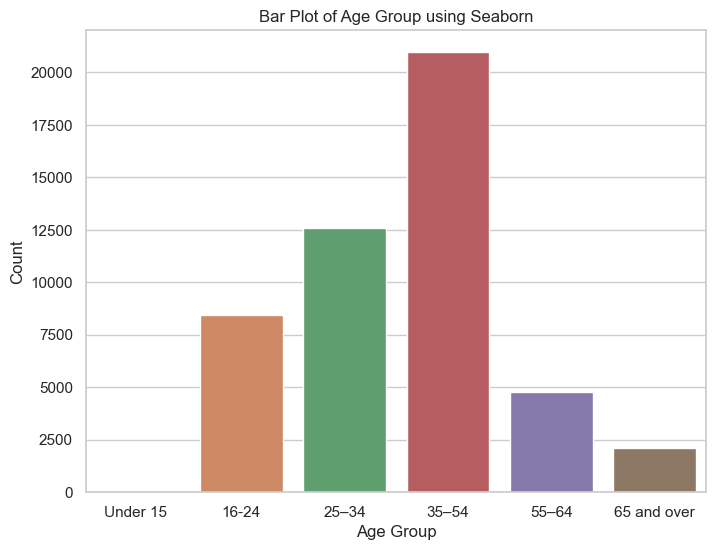

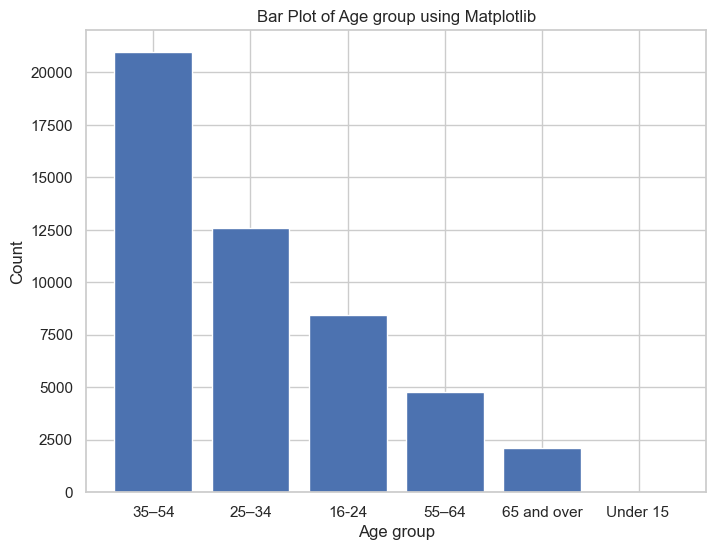

In [27]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['age_group'].value_counts().index, y=adult_df['age_group'].value_counts())
plt.title('Bar Plot of Age Group using Seaborn')
plt.xlabel('Age Group')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(8, 6))
age_counts = adult_df['age_group'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of Age group using Matplotlib')
plt.xlabel('Age group')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


From above results most of the population fall under the age group 35-54 year old followed by 25-34. And Obviously kids with age less than 15 years age cannot earn anything which resembles that data was authentic.

### Sex

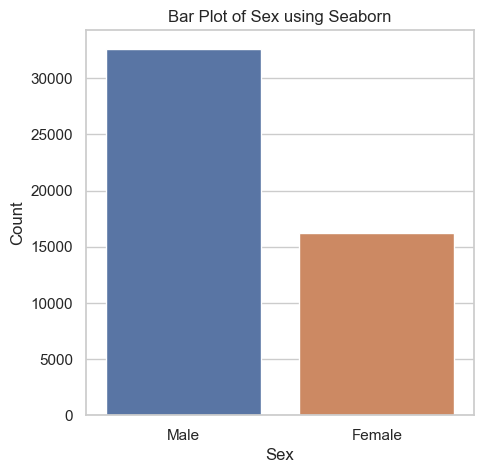

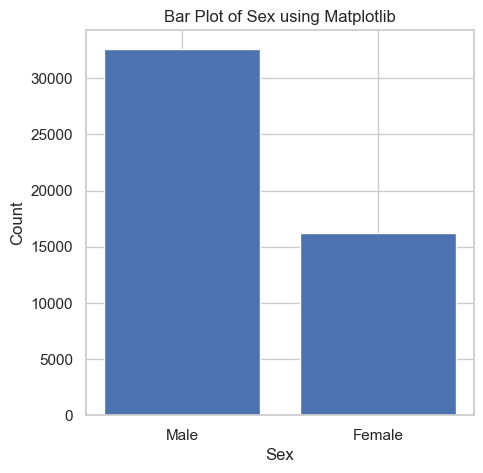

In [28]:
# Set the figure size
plt.figure(figsize=(5, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['sex'].value_counts().index, y=adult_df['sex'].value_counts())
plt.title('Bar Plot of Sex using Seaborn')
plt.xlabel('Sex')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(5, 5))
age_counts = adult_df['sex'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of Sex using Matplotlib')
plt.xlabel('Sex')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


#### Findings:
There is a skew in tha data that population in the data are mostly male and the populatin of females is very less and its a unbalanced data

### Race

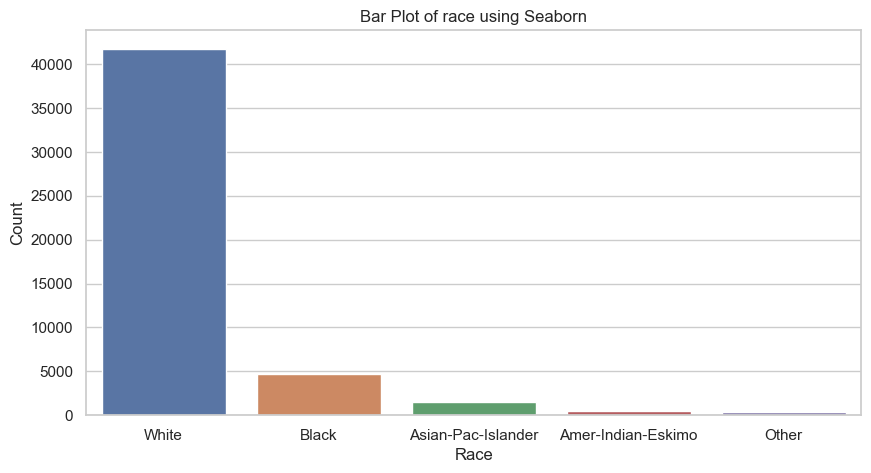

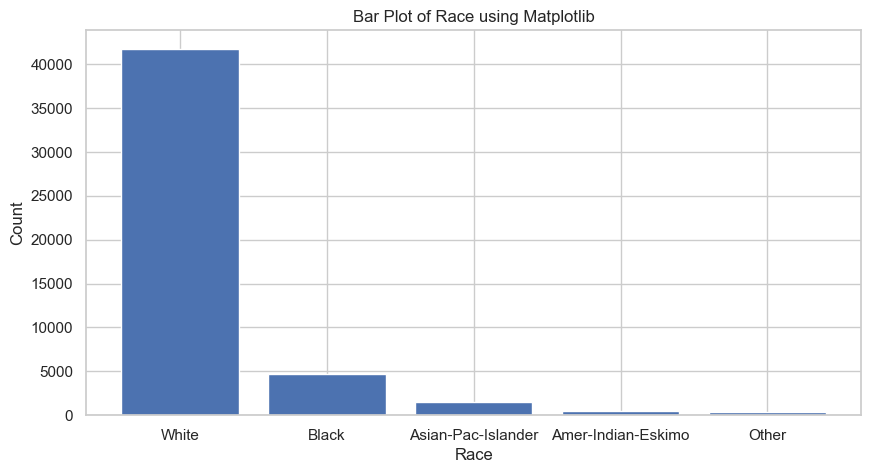

In [29]:
# Set the figure size
plt.figure(figsize=(10, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['race'].value_counts().index, y=adult_df['race'].value_counts())
plt.title('Bar Plot of race using Seaborn')
plt.xlabel('Race')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(10, 5))
age_counts = adult_df['race'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of Race using Matplotlib')
plt.xlabel('Race')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


#### Findings:
The data containes that most people are from White followed by the Black.From this we can say that data is authentic because as per the logic, legal immegrants like Asian-Pac and others will obsolutely less as the legal immigrants on work in USA might be less.

### Workclass

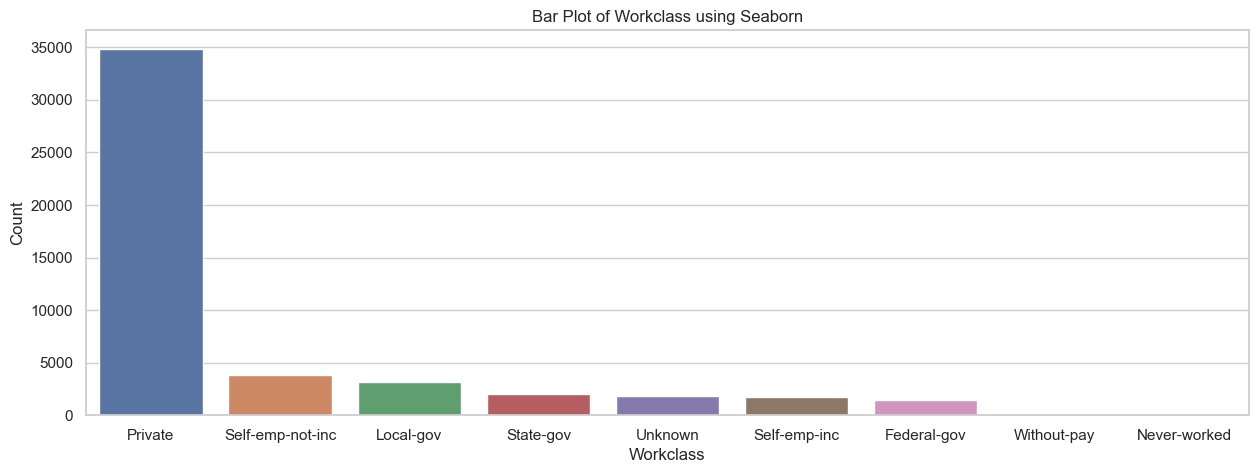

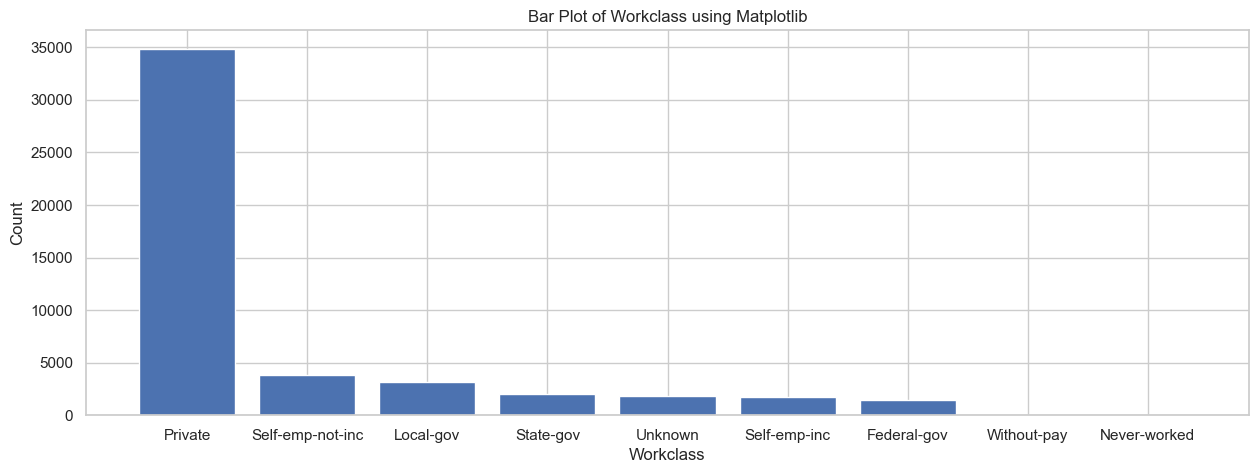

In [30]:
# Set the figure size
plt.figure(figsize=(15, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['workclass'].value_counts().index, y=adult_df['workclass'].value_counts())
plt.title('Bar Plot of Workclass using Seaborn')
plt.xlabel('Workclass')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(15, 5))
age_counts = adult_df['workclass'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of Workclass using Matplotlib')
plt.xlabel('Workclass')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


#### Findings
It is clear that most people working in private organization followed by the Self Employemnt.

### Education level


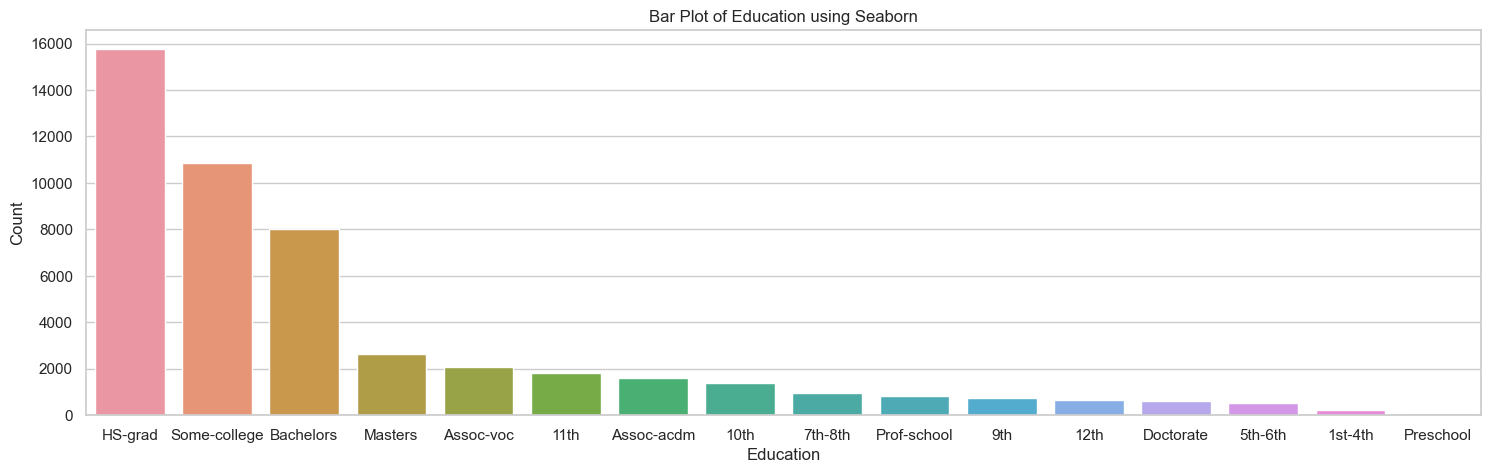

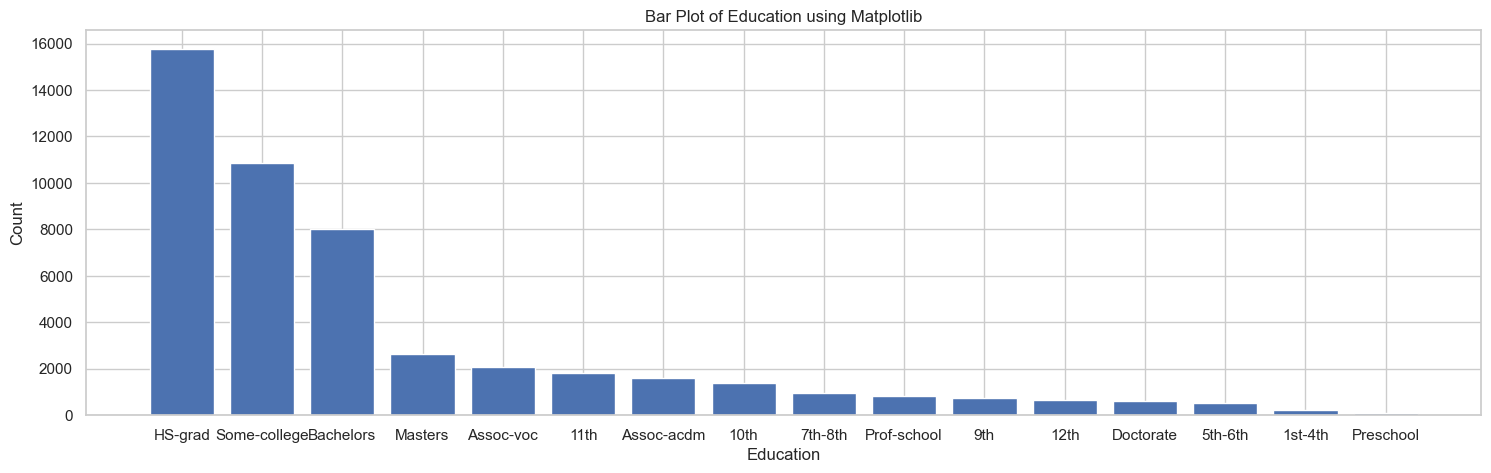

In [31]:
# Set the figure size
plt.figure(figsize=(18, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['education'].value_counts().index, y=adult_df['education'].value_counts())
plt.title('Bar Plot of Education using Seaborn')
plt.xlabel('Education')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(18, 5))
age_counts = adult_df['education'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of Education using Matplotlib')
plt.xlabel('Education')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


#### Findings:

The people with education level HS-Grad are very high compared to the Some college levele eductaion and then Bachelors.People are less interested in highes studies like Masters , Doctorate etc

## Marital - Status

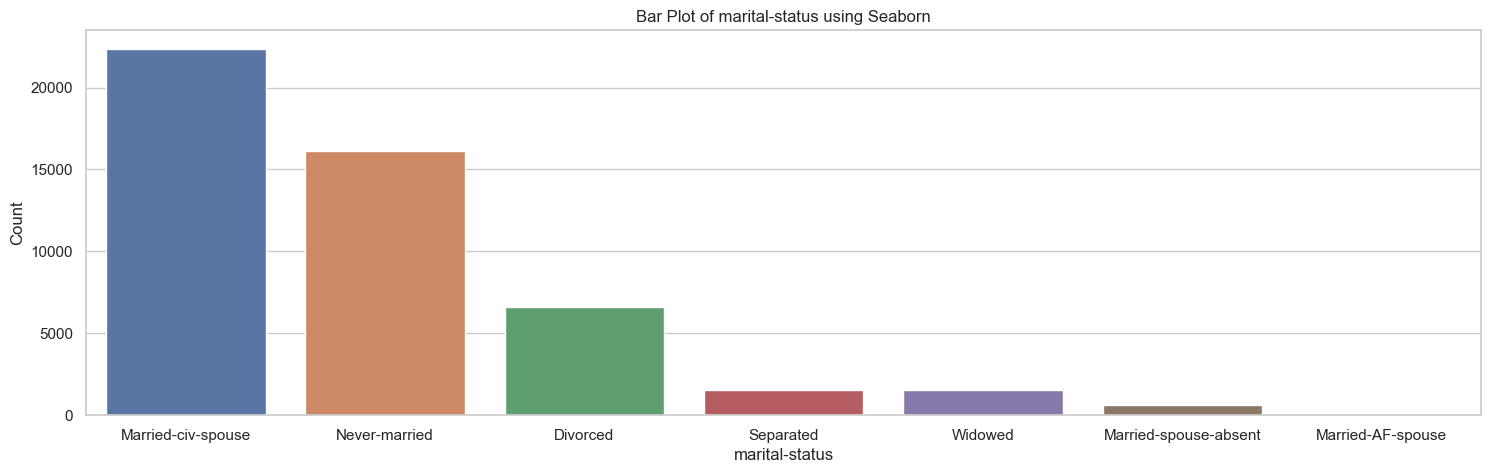

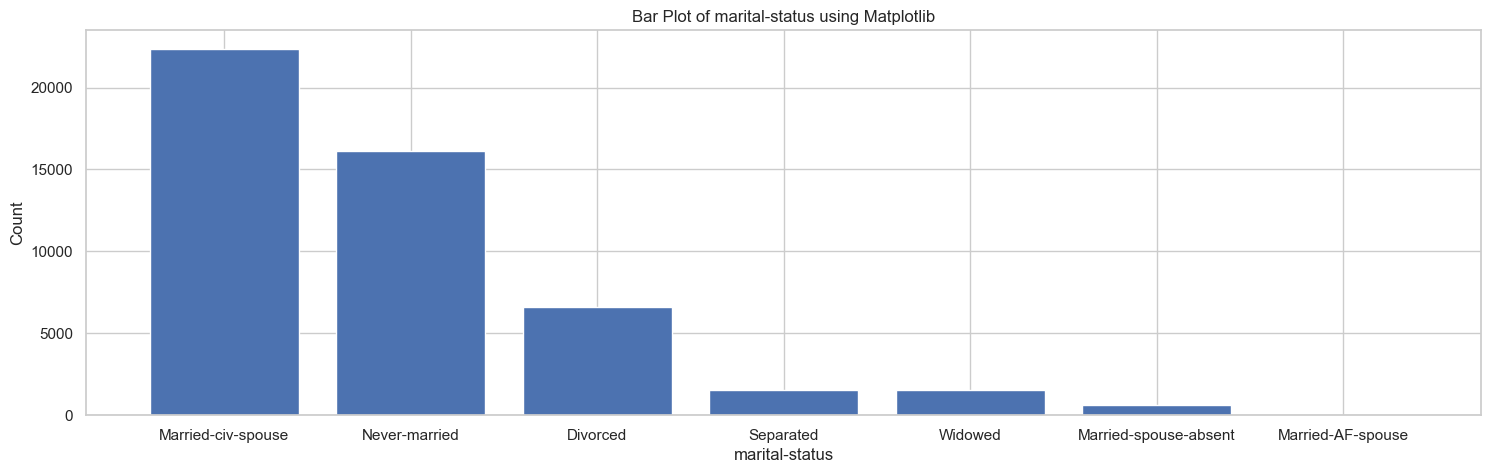

In [32]:
# Set the figure size
plt.figure(figsize=(18, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['marital-status'].value_counts().index, y=adult_df['marital-status'].value_counts())
plt.title('Bar Plot of marital-status using Seaborn')
plt.xlabel('marital-status')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(18, 5))
age_counts = adult_df['marital-status'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of marital-status using Matplotlib')
plt.xlabel('marital-status')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()

####Findings:

Married-civ-spouse are the majority marrital status who were working and then followed by the Never marries who are Unmarried people.

## Country

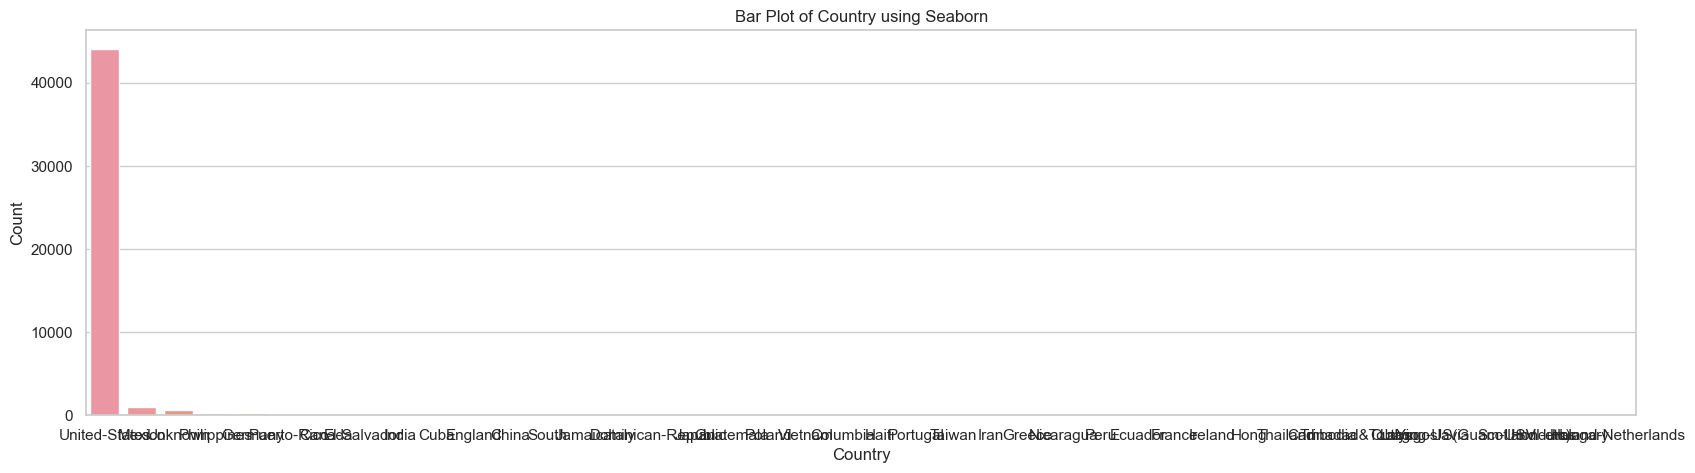

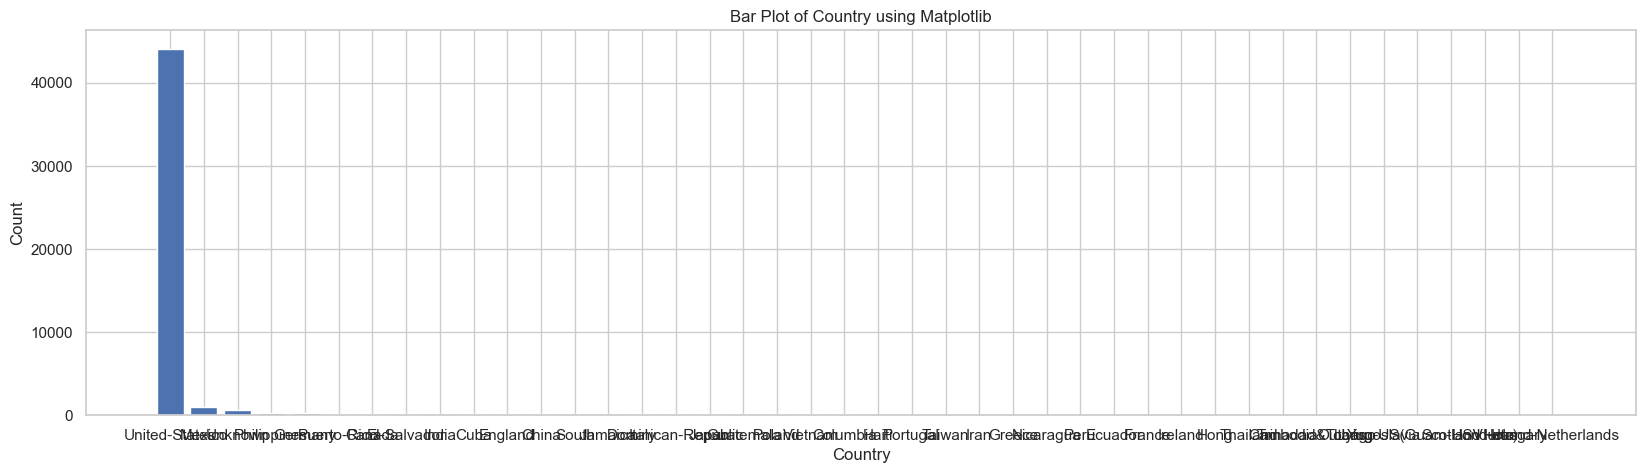

In [33]:
# Set the figure size
plt.figure(figsize=(20, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['native-country'].value_counts().index, y=adult_df['native-country'].value_counts())
plt.title('Bar Plot of Country using Seaborn')
plt.xlabel('Country')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(20, 5))
country_counts = adult_df['native-country'].value_counts()
plt.bar(country_counts.index, country_counts)
plt.title('Bar Plot of Country using Matplotlib')
plt.xlabel('Country')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


More people were from USA in the data who is working


## Hours Per Week

In [34]:
avg_hours=adult_df.groupby('age_group')['hours-per-week'].mean().reset_index()
avg_hours

,age_group,hours-per-week
0,Under 15,NaN
1,16-24,32.901091
2,25–34,42.108054
3,35–54,43.455304
4,55–64,40.641154
5,65 and over,29.684715


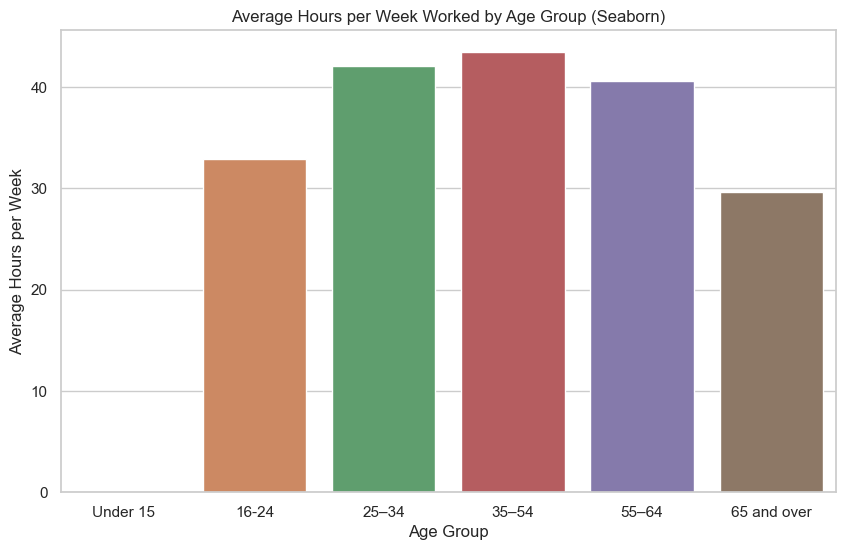

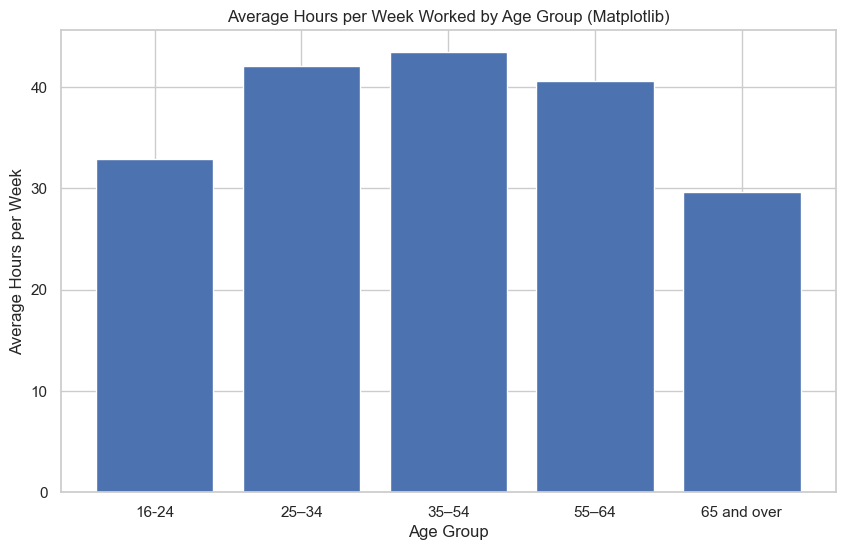

In [35]:
plt.figure(figsize=(10, 6))

# Using Seaborn
sns.barplot(data=avg_hours, x='age_group', y='hours-per-week')
plt.title('Average Hours per Week Worked by Age Group (Seaborn)')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Week')

# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(avg_hours['age_group'], avg_hours['hours-per-week'])
plt.title('Average Hours per Week Worked by Age Group (Matplotlib)')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Week')

# Show the Matplotlib plot
plt.show()

#### FIndings:
The people from age group of 35-54 were woeking more hours compared to other age groups.

##Income Level

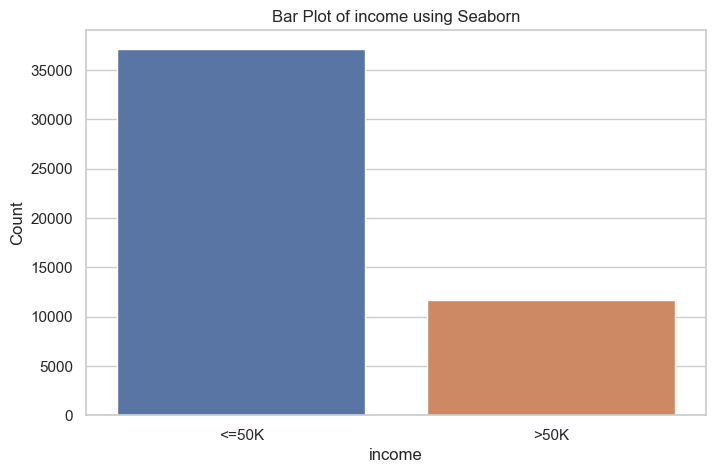

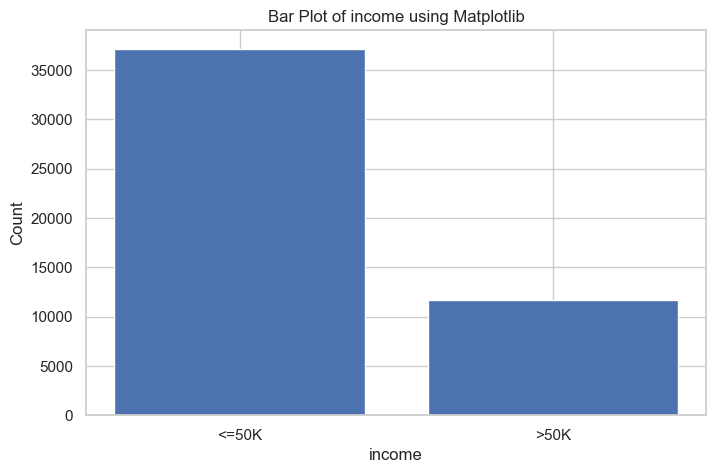

In [36]:
# Set the figure size
plt.figure(figsize=(8, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['income'].value_counts().index, y=adult_df['income'].value_counts())
plt.title('Bar Plot of income using Seaborn')
plt.xlabel('income')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(8, 5))
age_counts = adult_df['income'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of income using Matplotlib')
plt.xlabel('income')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()

#### Findings:
Most of the people have income level <=50K USD per year as per the above analysis

###1. Is there evidence of a gender pay gap within this dataset? Analyze income data to determine whether there is a significant difference in earnings between males and females.


In [37]:
adult_df.groupby(['sex', 'income']).size().unstack()

income,<=50K,>50K
sex,,
Female,14423,1769
Male,22732,9918


There is gender pay gap as can observe that more people in income level >50k are males very huge difference in the pay

In [38]:
adult_df.groupby(['sex', 'income'])['capital-gain'].mean().unstack()


income,<=50K,>50K
sex,,
Female,122.876586,4313.663652
Male,162.322673,3993.827586


But in terms of the capital gain Females has higher capital gain who fall under uncome level >50k but in income range <=50k males are has the upper hand

### 2.Investigate whether individuals with higher education levels tend to achieve greater income mobility and assess the extent to which education is a predictor of income growth.

<Figure size 1200x600 with 0 Axes>

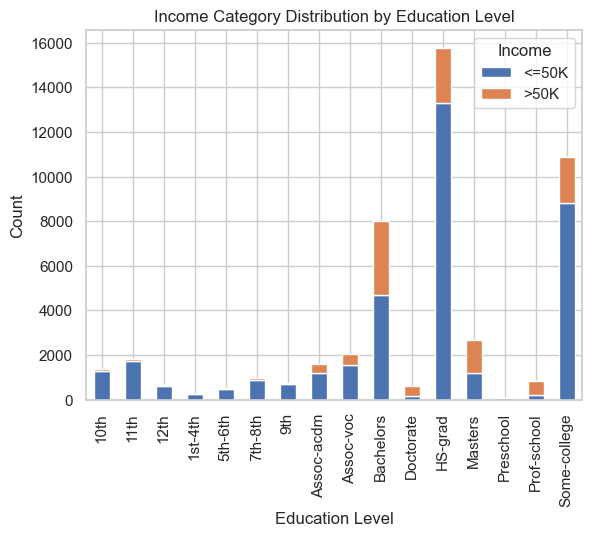

In [39]:
# Calculate the count of individuals in each income category for each education level
income_count_by_education = adult_df.groupby(['education', 'income'])['education'].count().unstack()
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize the count of individuals in each income category by education level
income_count_by_education.plot(kind='bar', stacked=True)
plt.title('Income Category Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Income', title_fontsize='12')

# Show the plot
plt.show()

It is evident that people with higher education level doesnt assure to get higher income. Instead particulary people with Bachelors and High Scool Grads are mostly getting income level >50k

###Do individuals working longer hours per week tend to earn higher incomes, or is there an optimal work-life balance that leads to better financial outcomes? Analyze the relationship between hours worked per week and income.

In [40]:
adult_df.groupby('income')['hours-per-week'].mean()

income
<=50K    38.840048
>50K     45.452896
Name: hours-per-week, dtype: float64

Obviosuly people working more hours are more likely to fall under income level >50k which means that more working hours will definately increase your income level but migh  effect work life balance badly.

###Explore income disparities across demographic categories such as race, marital status, and country of residence.

In [41]:
income_counts_df = adult_df.groupby(['native-country', 'race', 'marital-status', 'income']).size().unstack(fill_value=0)

# Rename columns for clarity
income_counts_df.columns = [f'Count_{col}' for col in income_counts_df.columns]

income_counts_df

Count_<=50K  \
native-country race               marital-status                       
Cambodia       Asian-Pac-Islander Married-civ-spouse               7   
                                  Married-spouse-absent            0   
                                  Never-married                    7   
                                  Widowed                          1   
               Black              Never-married                    2   
...                                                              ...   
Vietnam        White              Never-married                    1   
Yugoslavia     White              Divorced                         2   
                                  Married-civ-spouse               7   
                                  Never-married                    5   
                                  Widowed                          1   

                                                         Count_>50K  
native-country race               marital-status                     
Cambodia       Asian-Pac-Islander Married-civ-spouse              8  
                                  Married-spouse-absent           1  
                                  Never-married                   0  
                                  Widowed                         0  
               Black              Never-married                   0  
...                                                             ...  
Vietnam        White              Never-married                   0  
Yugoslavia     White              Divorced                        0  
                                  Married-civ-spouse              8  
                                  Never-married                   0  
                                  Widowed                         0  

[414 rows x 2 columns]

In terms of race, Whites has more income levels, In terms of country USA has more income people and in terms of Gender Males has more income levels.

#5.Conclusion:

the analysis of the dataset reveals several noteworthy insights. The majority of the population falls within the age group of 35-54 years, followed closely by those aged 25-34. The absence of individuals under the age of 15, who typically don't earn income, suggests the data's authenticity. The dataset appears to be unbalanced in terms of gender, with a significant male majority and a notably smaller female population. The higher representation of White individuals, in comparison to other racial groups, aligns with the expected demographic distribution, especially considering the prevalence of legal immigrants from Asian-Pacific regions. In terms of education, a substantial portion of the population holds an education level of "HS-Grad," followed by "Some College" and "Bachelors," with fewer individuals pursuing higher degrees like "Masters" and "Doctorate." Private organizations employ the majority, with "Married-civ-spouse" and "Never married" individuals forming the most prevalent marital statuses among the workforce. The age group of 35-54 tends to work longer hours, indicating a potential impact on work-life balance. The data highlights a notable gender pay gap, particularly in income levels >50k, although females exhibit higher capital gains in this category. Interestingly, individuals with higher education levels do not always secure higher income, as "Bachelors" and "High School Grads" are more likely to achieve income levels >50k. The analysis implies that longer working hours correlate with higher income, but this might come at the expense of work-life balance. These insights can be valuable for government policymakers, employers, and labor market researchers, allowing them to understand demographic and income patterns, address gender pay disparities, and make informed decisions regarding education and labor policies, ultimately contributing to more equitable and informed workforce strategies.

#6.References:


    https://archive.ics.uci.edu/dataset/2/adult
    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
    
    https://www.bls.gov/careeroutlook/2018/data-on-display/education-pays.htm

    https://docs.kanaries.net/articles/exploratory-data-analysis-python-pandas